# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<br/>

<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>

# <center>Exercício - Processamento e visualização de dados</center>

Frequentemente, a visualização dos dados auxilia na interpretação e na análise de como eles estão distribuídos.

O Python possui algumas bibliotecas que facilitam o processo de visualização, tais como: `Pandas`, `Matplotlib` e `Seaborn`.

Primeiro, vamos carregar os dados do arquivo.

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "dados"

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os #importa a biblioteca para tarefas relacionadas ao sistema operacional

if __name__ == '__main__':
    # importa o arquivo e guarda em um dataframe do Pandas
    df_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'iris.csv'), sep=',', index_col=None) 

    print('Dados importados com sucesso!')

Dados importados com sucesso!


Agora, vamos dar uma olhada nas 10 primeiras amostras da base de dados

In [2]:
if __name__ == '__main__':
    # Vamos usar a função display para imprimir o dataframe. 
    # Também poderíamos ter usado a função print(df_dataset.head(n=10))
    display(df_dataset.head(n=10))

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
0,0,5.1,3.5,1.4,0.2,São Paulo,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Sorocaba,Iris-setosa
2,2,4.7,3.2,1.3,0.2,São Paulo,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Sorocaba,Iris-setosa
4,4,5.0,3.6,1.4,0.2,São Paulo,Iris-setosa
5,5,5.4,3.9,1.7,0.4,Sorocaba,Iris-setosa
6,6,4.6,3.4,1.4,0.3,São Paulo,Iris-setosa
7,7,5.0,3.4,1.5,0.2,São Paulo,Iris-setosa
8,8,4.4,2.9,1.4,0.2,Campinas,Iris-setosa
9,9,4.9,3.1,1.5,0.1,Sorocaba,Iris-setosa


A base de dados contém amostras de flores (linhas) representadas pelos seguintes atributos (colunas): `id_planta`, `comprimento_sepala`, `largura_sepala`, `comprimento_petala`, `largura_petala` e `cidade_origem`. Por fim, temos o atributo `classe` que contém a espécie de cada flor.

O atributo `id_planta` é qualitativo, uma vez que é usado para identificar uma determinada amostra. Apesar dele possuir valores numéricos crescentes, ele exerce apenas a função de identificação e seus valores poderiam ser trocados por outros identificadores não numéricos sem nenhum prejuízo. O atributo `cidade_origem` também é qualitativo. Os atributos `comprimento_sepala`, `largura_sepala`, `comprimento_petala` e `largura_petala` são quantitativos contínuos.

Quanto à escala, os atributos `id_planta` e `cidade_origem` são qualitativos nominais, enquanto os atributos `comprimento_sepala`, `largura_sepala`, `comprimento_petala` e `largura_petala` são quantitativos racionais.

O atributo `classe` é qualitativo nominal e representa espécies de flores. Portanto, o problema em questão é de <b>aprendizado supervisionado</b> => <b>classificação</b>.

## Pré-processamento: eliminação de atributos irrelevantes

O objetivo do problema é identificar a espécie de uma flor (`classe`), dados os demais atributos. Neste caso, não é preciso uma análise profunda para observar que os atributos `id_planta` e `cidade_origem` não contribuem para a identificação da classe. Portanto, em uma tarefa de aprendizado de máquina, devemos remover esses atributos, pois são irrelevantes. 

In [3]:
if __name__ == '__main__':
    # remove as colunas *id_planta* e *cidade_origem*
    df_dataset = df_dataset.drop(columns=['id_planta','cidade_origem'])

    # imprime o dataframe
    display(df_dataset.head(n=10))

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Pré-processamento: tratamento de atributos com valores ausentes

Outro passo importante, é verificar se existem atributos com valores ausentes (*NaN*) na base de dados.

In [4]:
if __name__ == '__main__':
    # índices das linhas que contém valores NaN
    idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()
    
    # imprime apenas as linhas com valoes ausentes
    display(df_dataset.iloc[idxRowNan])

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,NaN,1.7,0.5,Iris-setosa
24,4.8,NaN,1.9,0.2,Iris-setosa
30,4.8,3.1,NaN,0.2,Iris-setosa


Como podemos ver, o atributo `largura_sepala` possui 2 amostras com valores ausentes. Já o atributo `comprimento_petala` possui 1 amostra com valor faltante. 

Existem diversas técnicas para tratar atributos faltantes. Como este problema possui poucos valores ausentes, preencha esses valores com a média dos valores conhecidos da respectiva classe (`Iris-setosa`).

In [5]:
def trataFaltantes( df_dataset ):
    
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # substitua os valores faltantes pela média dos outros valores do mesmo atributo
    # de amostras que sejam da mesma classe
    
    df_dataset = df_dataset.fillna(df_dataset.groupby('classe').transform('mean'))
    
    ##########################################################################
    
    return df_dataset.round(6)

if __name__ == '__main__':
    df_dataset = trataFaltantes( df_dataset )
    
    # imprime apenas as linhas que antes possuiam valores NaN
    print('\nAmostras que possuiam valores faltantes:')
    display(df_dataset.iloc[idxRowNan])


Amostras que possuiam valores faltantes:


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,3.416667,1.700000,0.5,Iris-setosa
24,4.8,3.416667,1.900000,0.2,Iris-setosa
30,4.8,3.100000,1.461224,0.2,Iris-setosa


## Pré-processamento: tratamento de dados inconsistentes e/ou redundantes

Outro passo importante, é verificar se existem dados inconsistentes e/ou redundantes. A forma mais comum de inconsistência é quando há amostras representadas por atributos com todos os valores iguais, mas com classes diferentes. A redundância é dada pela repetição de linhas na base de dados.

A seguir, vamos verificar se existem amostras duplicadas (redundantes) e inconsistentes.

In [6]:
if __name__ == '__main__':
    df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

    # se tiver valores redundantes ou inconsistentes, imprima 
    if len(df_duplicates)>0:
        print('\nAmostras redundantes ou inconsistentes:')
        display(df_duplicates)
    else:
        print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor
102,5.8,2.7,5.1,1.9,Iris-virginica
123,7.7,2.8,6.7,2.0,Iris-virginica
124,7.7,2.8,6.7,2.0,Iris-virginica
144,5.8,2.7,5.1,1.9,Iris-virginica


Como podemos ver, existem algumas amostras redudantes (duplicadas) e outras inconsistentes (amostras iguais, mas com classes distintas). 

Primeiro, remova as amostras redundantes, mantendo na base apenas uma delas.

In [7]:
def delDuplicatas( df_dataset ):
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Para cada grupo de amostras duplicadas, mantenha uma e apague as demais
    
    # remova as amostras duplicadas, mantendo apenas a PRIMEIRA ocorrencia
    
    df_dataset = df_dataset.drop_duplicates(keep='first')
    
    ##########################################################################

    return df_dataset

if __name__ == '__main__':
    df_dataset = delDuplicatas( df_dataset )


Após remover as amostras redundantes, é preciso checar se há amostras inconsistentes. 

In [8]:
if __name__ == '__main__':
    # para detectar inconsistências, a rotina abaixo obtém as amostras onde os valores 
    # dos atributos continuam duplicados. Neste caso, os atributos serão iguais, mas as classes serão distintas
    df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

    # se tiver valores inconsistentes, imprime 
    if len(df_duplicates)>0:
        print('\nAmostras inconsistentes:')
        display(df_duplicates)
    else:
        print('Não existem mostras inconsistentes')
    


Amostras inconsistentes:


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor


Se a remoção de amostras redundantes estiver correta, poderão ser visualizadas acima duas amostras inconsistentes. Nesse caso, como não é possível saber qual das amostras está correta, elimine as duas.

In [9]:
def delInconsistencias( df_dataset ):


    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # remova todas as amostras inconsistentes da base de dados
    
    df_dataset = df_dataset[df_dataset.groupby(['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'])['classe'].transform('nunique') == 1]

    ##########################################################################
    
    return df_dataset

if __name__ == '__main__':
    df_dataset = delInconsistencias( df_dataset )

    # --- Checagem ---
    # obtém apenas as amostras onde os valores dos atributos estão duplicados
    df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

    # se tiver valores redundantes ou inconsistentes, imprime 
    if len(df_duplicates)>0:
        display(df_duplicates)
    else:
        print('Não existem amostras redundantes ou inconsistentes')
    

Não existem amostras redundantes ou inconsistentes


Agora, vamos gerar algumas estatísticas sobre a base de dados.

A função `describe()` da `Pandas` sumariza as principais estatísticas sobre os dados de um _data frame_, como a média, o desvio padrão, valor máximo, valor mínimo e alguns percentis.

In [10]:
if __name__ == '__main__':
    # apresenta as principais estatísticas sobre a base de dados
    df_detalhes = df_dataset.describe()
    
    print(df_detalhes)

       comprimento_sepala  largura_sepala  comprimento_petala  largura_petala
count          146.000000      146.000000          146.000000      146.000000
mean             5.958219        3.190639            3.795625        1.215753
std              1.493284        1.715087            1.755223        0.755822
min              4.300000        2.000000            1.000000        0.100000
25%              5.100000        2.800000            1.600000        0.300000
50%              5.800000        3.000000            4.400000        1.300000
75%              6.400000        3.400000            5.100000        1.800000
max             20.900000       23.100000            6.900000        2.500000


## Pré-processamento: normalização dos atributos

Observe que a média do atributo `comprimento_sepala` é bastante superior a média do atributo `largura_petala`. Diante disso, está claro que a escala dos atributos é diferente, o que pode prejudicar alguns métodos de aprendizado de máquina. Portanto, normalize os valores dos atributos para que fiquem com média igual a zero e desvio padrão igual a um. 

In [11]:
def normalizar(X):
    """
    Normaliza os atributos em X
    
    Esta função retorna uma versao normalizada de X onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com 
    métodos de aprendizado de máquina.
    """
    
    m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto
    
    # Incializa as variaves de saída
    X_norm = np.random.rand(m,n) #inicializa X_norm com valores aleatórios
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instruções: Calcule a média de cada atributo de X e armazene em mu. Note
    #          que se X for uma matriz (m x n), então mu terá que ser um
    #          vetor (1 x n), no qual cada coluna de mu deverá conter o 
    #          valor da média de cada um dos n atributos. O mesmo deverá ser
    #          feito para o desvio padrão, que deverá ser armazenado em
    #          sigma. 
    #          Sugestão: use as funções mean e std da biblioteca numpy para  
    #                    calcular a média e o desvio padrão, respectivamente.
    #                    Se você for usar a função do Numpy para calcular o 
    #                    desvio padrão, não se esqueça de usar o parâmetro ddof=1 
    #                    para fazer a correção de Bessel         
    #          Uma vez encontrados os valores de mu e de sigma, calcule o
    #          valor do atributo X normalizado. Para isso, para cada amostra
    #          x_i de X será necessário calcular (x_i - mu)/sigma e
    #          armazenar em X_norm (base de dados normalizada).
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    
    for i, x_i in enumerate(X):
        X_norm[i] = (x_i - mu) / sigma
        
    ##########################################################################
    
    return X_norm, mu, sigma

if __name__ == '__main__':
    # coloca os valores dos atributos na variável X
    X = df_dataset.iloc[:,0:-1].values

    # chama a função para normalizar X
    X_norm, mu, sigma = normalizar(X)
    
    df_dataset.iloc[:,0:-1] = X_norm

    print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
    print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].')
    print('\nPrimeira amostra da base apos normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))



Primeira amostra da base antes da normalização: [5.1000 3.5000].

Após a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].

Primeira amostra da base apos normalização: [-0.5747 0.1804].


Agora que os dados estão normalizados, vamos analisar as informações estatísticas novamente.

In [12]:
if __name__ == '__main__':
    # apresenta as principais estatísticas sobre a base de dados
    df_detalhes = df_dataset.describe()
    
    display(df_detalhes.round(8))

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,146.000000,146.000000,146.000000,146.000000
mean,0.000000,-0.000000,-0.000000,0.000000
std,1.000000,1.000000,1.000000,1.000000
min,-1.110451,-0.694215,-1.592746,-1.476211
25%,-0.574719,-0.227766,-1.250909,-1.211599
50%,-0.105954,-0.111154,0.344330,0.111463
75%,0.295845,0.122070,0.743139,0.772995
max,10.005986,11.608365,1.768650,1.699138


Se a normalização foi aplicada corretamente, a média (*mean*) deve ter ficado igual a 0 e o desvio padrão (*std*) igual a 1. 

## Pré-processamento: detecção de outliers

Outro passo importante na análise e tratamento dos dados é a detecção de outliers (*i.e.*, dados resultados de leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém outliers é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

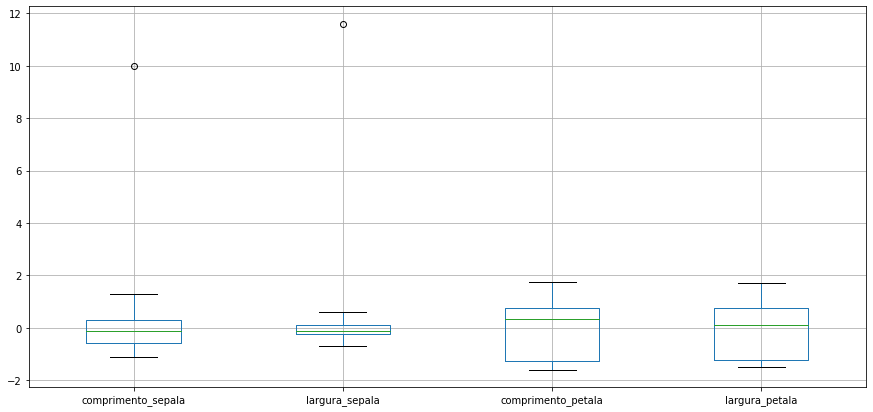

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # apresenta as principais estatísticas sobre a base de dados
    df_dataset.boxplot(figsize=(15,7))
    plt.show()

O box plot está indicando que os atributos `comprimento_sepala` e `largura_sepala` possuem outliers, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois tratam-se de amostras com valores de atributos incorretos. 

Outra forma de analisar se a base de dados contém outliers é usar gráficos de dispersão. Podemos plotar gráficos de dispersão de todas as combinações de atributos da base de dados usando a função `scatter_matrix` da `Pandas`.

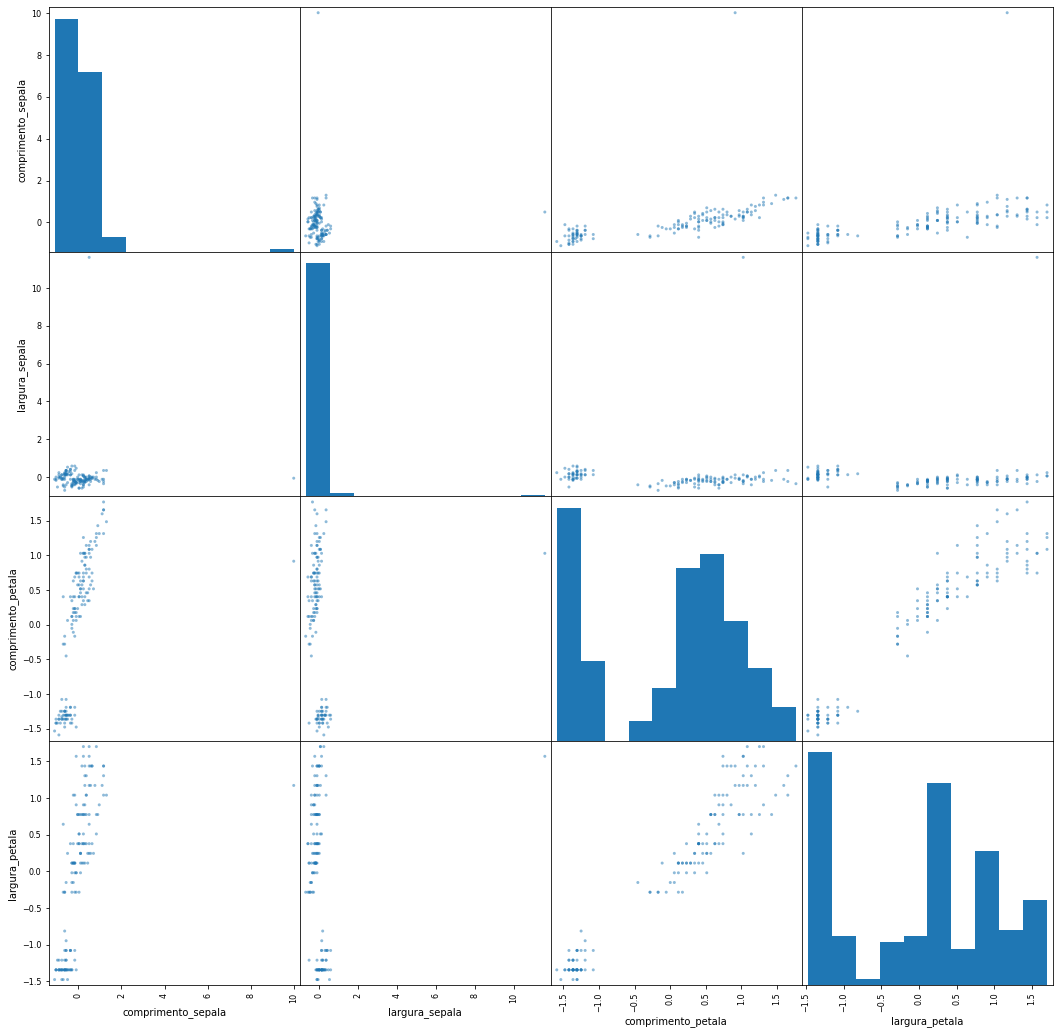

In [14]:
if __name__ == '__main__':
    pd.plotting.scatter_matrix(df_dataset, figsize=(18,18))    
    plt.show()

Outra forma de plotar gráficos de dispersão a partir dos _dataframes_ é usando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos. 

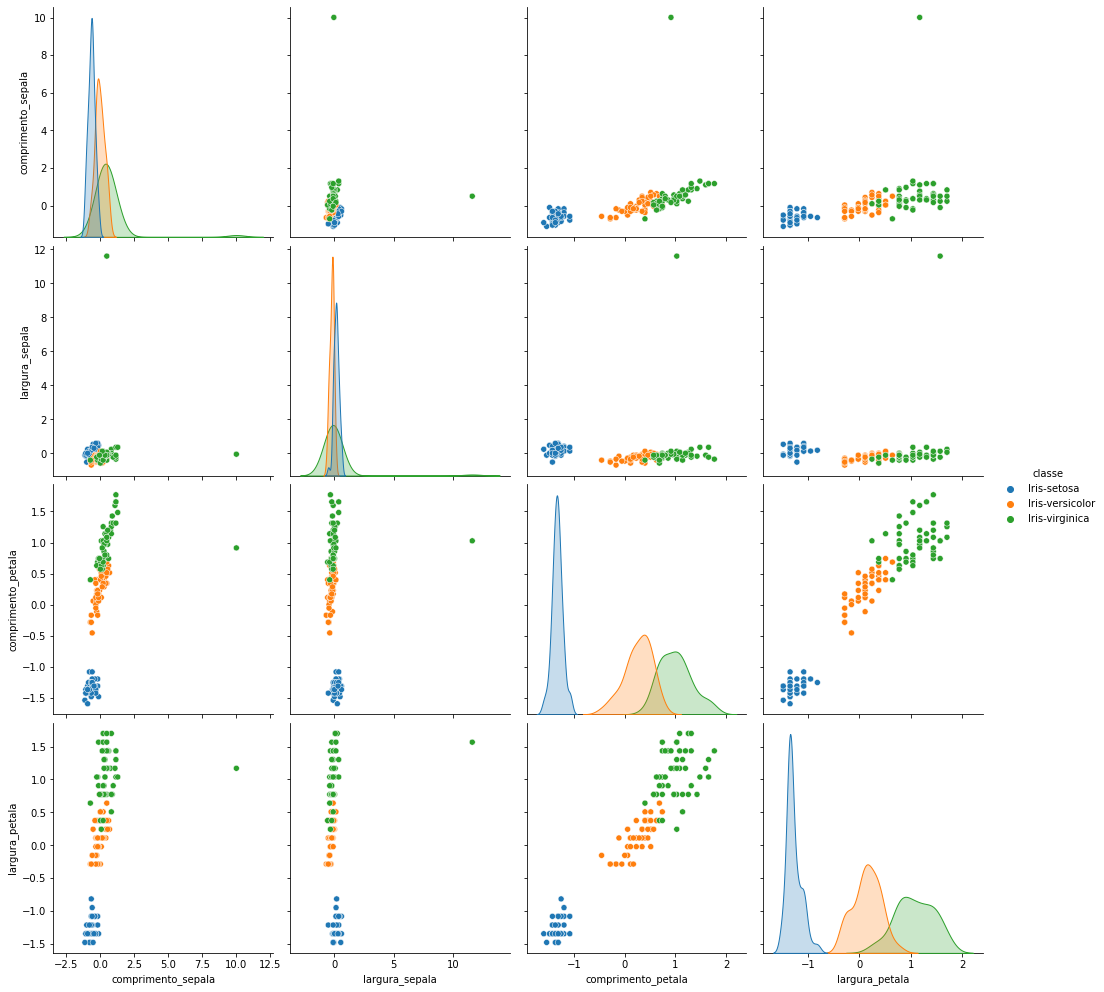

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # matriz de gráficos scatter 
    sns.pairplot(df_dataset, hue='classe', height=3.5)
    
    # mostra o gráfico usando a função show() da matplotlib
    plt.show()

Observando os gráficos de dispersão, é fácil perceber que existem duas amostras da classe *Iris-virginica* que estão deslocadas no espaço em relação às demais amostras.

Pelos gráficos, os outliers parecem ser mais visíveis na combinação dos atributos `comprimento_sepala` e `largura_sepala`. Então, vamos usar a função `lmplot` da biblioteca `Seaborn`para visualizar a combinação desses dois atributos.

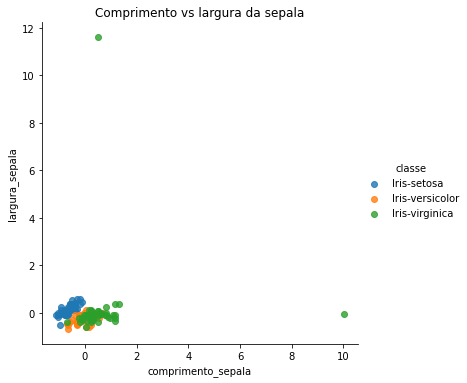

In [16]:
if __name__ == '__main__':
    # Scatter plot
    sns.lmplot(x='comprimento_sepala', y='largura_sepala', data=df_dataset, 
               fit_reg=False,  # No regression line
               hue='classe')   # Color by evolution stage
    
    # cria um título para o gráfico
    plt.title('Comprimento vs largura da sepala')
    
    # mostra o gráfico
    plt.show()

Pelos gráficos vistos até o momento, fica claro que um dos outliers possui um alto valor no atributo `largura_sepala`. Já o segundo outlier contém um alto valor no atributo `comprimento_sepala`. 

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

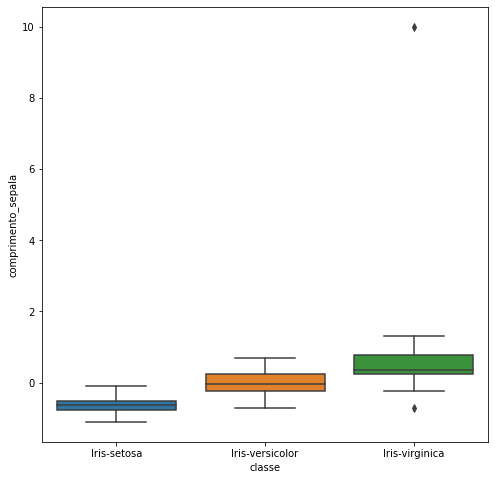

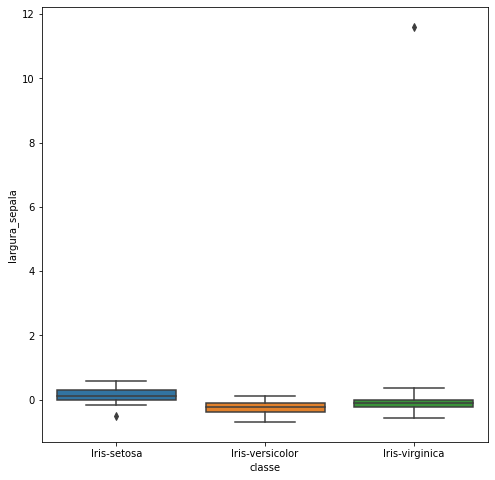

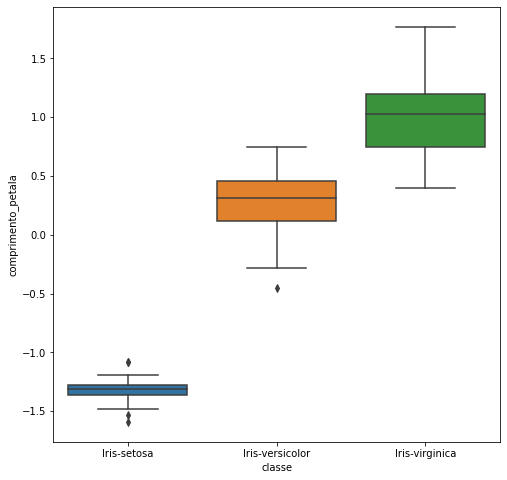

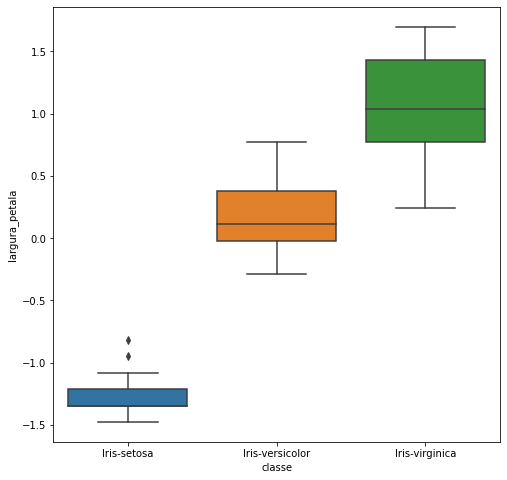

In [17]:
if __name__ == '__main__':
    for atributo in df_dataset.columns[:-1]:
        # define a dimensão do gráfico
        plt.figure(figsize=(8,8))
    
        # cria o boxplot
        sns.boxplot(x="classe", y=atributo, data=df_dataset, whis=1.5)
    
        #mostra o gráfico
        plt.show()

Os box plots dos atributos mostraram outros outliers que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados outliers se analisarmos as classes individualmente, mas não são considerados outliers se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar outliers é o histrograma. Portanto, vamos usá-lo para analisar cada atributo.

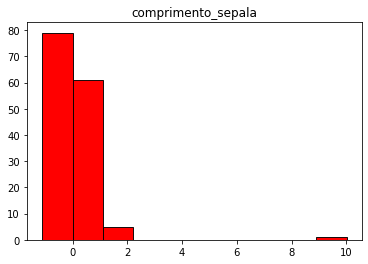

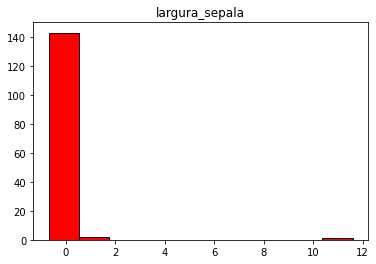

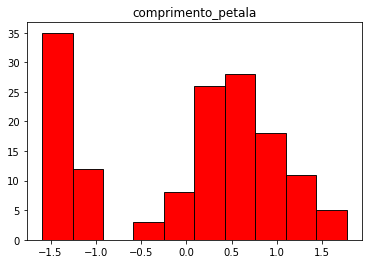

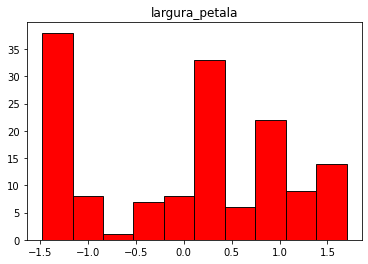

In [18]:
if __name__ == '__main__':
    for atributo in df_dataset.columns[:-1]:

        # cria o histograma
        n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

        # cria um título para o gráfico
        plt.title(atributo)

        #mostra o gráfico
        plt.show()

Nos histogramas, os outliers mais evidentes estão nos atributos `comprimento_sepala` e `largura_sepala`.

Agora, vamos usar um gráfico de densidade para fazer o mesmo tipo de análise.

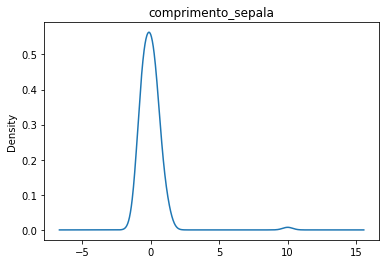

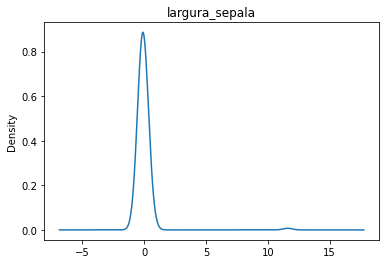

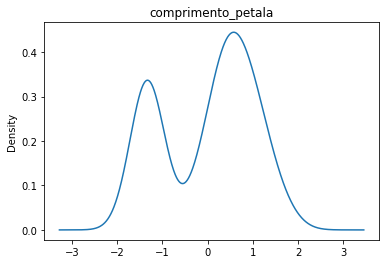

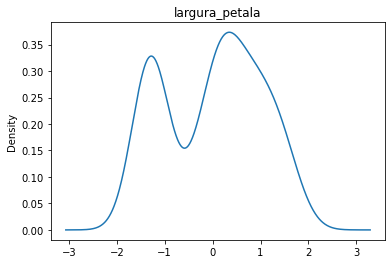

In [19]:
if __name__ == '__main__':
    for atributo in df_dataset.columns[:-1]:

        # criando o gráfico de densidade para cada atributo
        densityplot = df_dataset[atributo].plot(kind='density')

        # cria um título para o gráfico
        plt.title(atributo)

        # mostra o gráfico
        plt.show()

Conforme podemos ver pelos gráficos de densidade, a maioria dos valores dos atributos `comprimento_sepala` e `largura_sepala` estão próximos de 0. Portanto, as duas amostras que contém valores próximos de 10 nesses atributos, podem ser consideradas outliers.

Uma das maneiras mais simples de tratar um outlier é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$. 

Com base nessas informações, complete a função abaixo para remover os outliers da base de dados. Use como base o IQR de cada atributo em relação a todos os valores na base de dados, em vez do IQR individual de cada classe.

<ipython-input-20-0482ae6d2421>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_dataset = df_dataset[~((df_dataset < (Q1 - 1.5 * IQR)) | (df_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-20-0482ae6d2421>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_dataset = df_dataset[~((df_dataset < (Q1 - 1.5 * IQR)) | (df_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


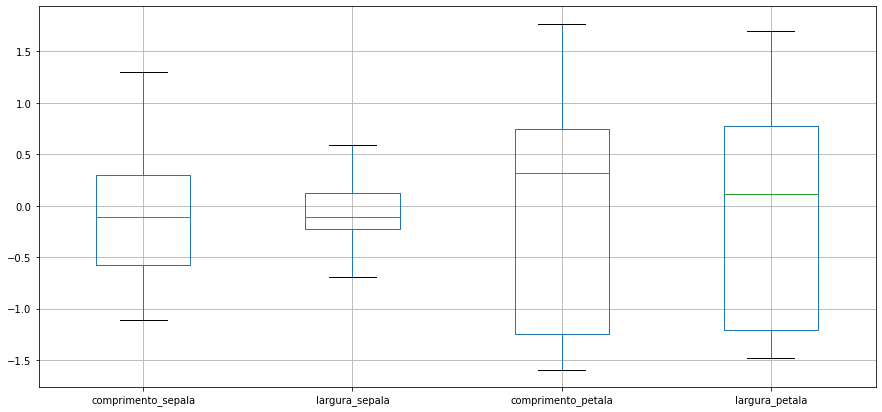

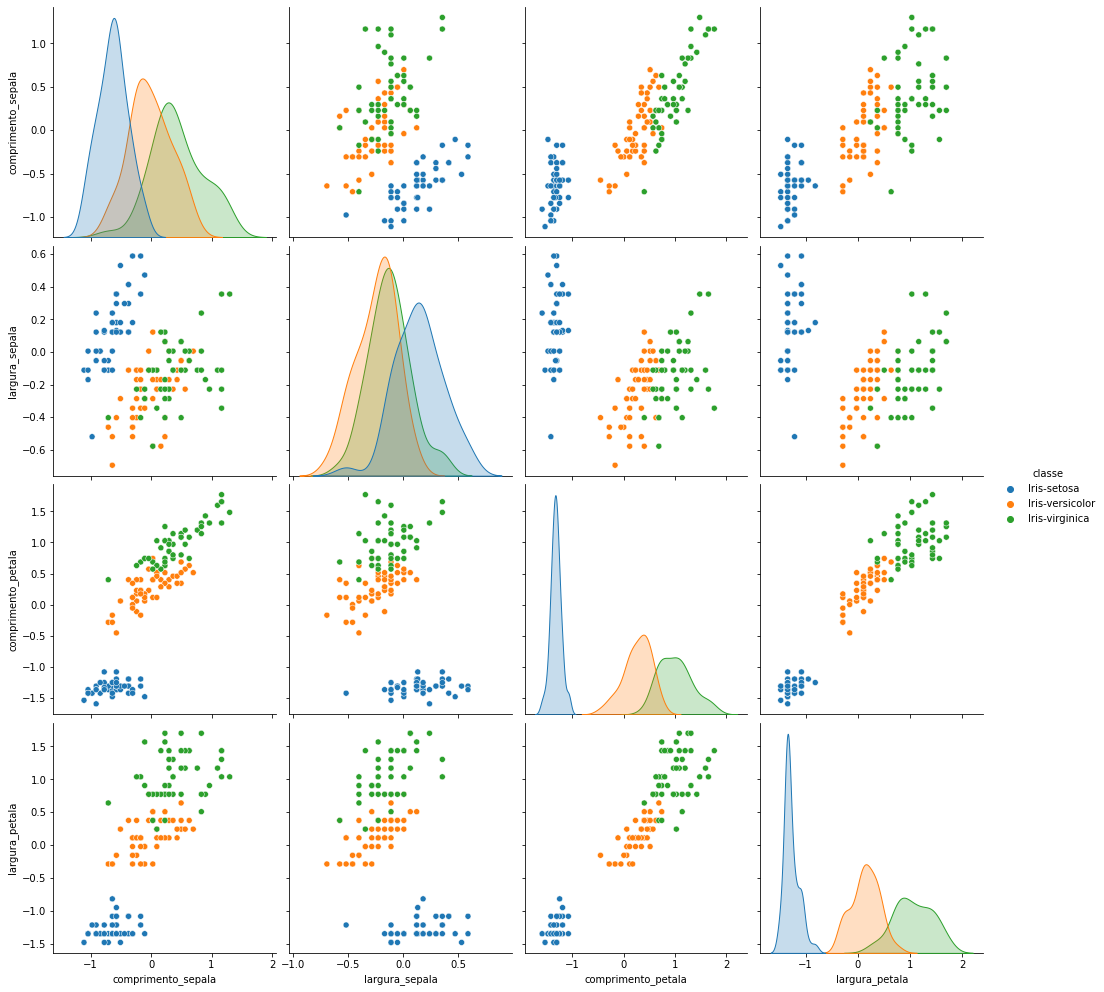

In [20]:
def removeOutliers(df_dataset):

    
    ################# COMPLETE O CÓDIGO AQUI  #################
    # Remova os outliers da base de dados
    
    Q1 = df_dataset.quantile(0.25)
    Q3 = df_dataset.quantile(0.75)
    IQR = Q3 - Q1
    
    df_dataset = df_dataset[~((df_dataset < (Q1 - 1.5 * IQR)) | (df_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

    ##########################################################################
    
    return df_dataset

if __name__ == '__main__':
    # --- Checagem ---
    df_dataset = removeOutliers( df_dataset )

    # apresenta as principais estatísticas sobre a base de dados
    df_dataset.boxplot(figsize=(15,7))
    plt.show()

    # matriz de gráficos scatter 
    sns.pairplot(df_dataset, hue='classe', height=3.5);

    # mostra o gráfico usando a função show() da matplotlib
    plt.show()

Se a remoção foi realizada corretamente, o box plot e os gráficos de dispersão indicarão que não há mais nenhum outlier na base de dados. 

Com os novos gráficos de dispersão, também é possível perceber que a classe *Iris-setosa* é mais fácil de identificar, pois está mais separada no espaço de atributos. Por outro lado, em várias combinações de atributos, as classes *Iris-versicolor* e *Iris-virginica* se misturam.

**IMPORTANTE:** antes de realizar a remoção de outliers, é mandatório analisar cuidadosamente a característica das amostras antes de removê-las. Em alguns casos, remover os outliers pode ser prejudicial. Além disso, algumas tarefas de aprendizado de máquina são voltadas para a detecção de outliers e, portanto, esses dados não podem ser removidos. Adicionalmente, se a base de dados for desbalanceada, a remoção dos outliers com base nas estatísticas de toda a base, pode acabar removendo amostras da classe minoritária (aquela que possui menos amostras). Ainda, alguns métodos de classificação, tais como métodos baseados em *ensemble* e métodos baseados em árvores, costumam ser robustos a outliers. Diante disso, em alguns problemas, é recomendável remover apenas aqueles outliers que são claramente erros de leitura/digitação, isto é, valores que estão fora dos limites aceitáveis para o que é esperado para um determinado atributo (por exemplo, uma pessoa com 500 anos ou um bebê com 300 kg). 

## Pré-processamento: distribuição das classes

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

Iris-setosa        47
Iris-versicolor    50
Iris-virginica     47
Name: classe, dtype: int64

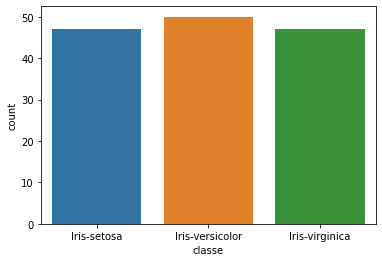

In [21]:
if __name__ == '__main__':
    display( df_dataset['classe'].value_counts().sort_index() )

    # cria um gráfico de barras com a frequência de cada classe
    sns.countplot(x="classe", data=df_dataset)

    #mostra o gráfico
    plt.show()

Conforme podemos ver, as classes são balanceadas. Se o número de exemplos em alguma das classes fosse muito superior às demais, teríamos que usar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

## Pré-processamento: correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Podemos fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

Primeiro, vamos fazer usando a `Numpy`.

In [22]:
if __name__ == '__main__':
    # criando uma matriz X com os valores do data frame
    X = df_dataset.iloc[:,:-1].values

    # matriz de covariancia
    covariance = np.cov(X, rowvar=False)

    # matriz de correlação
    correlation = np.corrcoef(X, rowvar=False)

    print('Matriz de covariância: ')
    display(covariance)

    print('\n\nMatriz de correlação: ')
    display(correlation)

Matriz de covariância: 


array([[ 0.30676543, -0.01565835,  0.48133208,  0.44703238],
       [-0.01565835,  0.06514528, -0.108382  , -0.09181009],
       [ 0.48133208, -0.108382  ,  1.00057004,  0.955908  ],
       [ 0.44703238, -0.09181009,  0.955908  ,  0.98688341]])



Matriz de correlação: 


array([[ 1.        , -0.11076466,  0.86879609,  0.81246161],
       [-0.11076466,  1.        , -0.42451389, -0.36208954],
       [ 0.86879609, -0.42451389,  1.        ,  0.96196534],
       [ 0.81246161, -0.36208954,  0.96196534,  1.        ]])

Agora, vamos calcular as matrizes de correlação e covariância usando a `Pandas`.

In [23]:
if __name__ == '__main__':
    # matriz de covariancia
    df_covariance = df_dataset.cov()

    # matriz de correlação
    df_correlation = df_dataset.corr()

    print('Matriz de covariância: ')
    display(df_covariance)

    print('\n\nMatriz de correlação: ')
    display(df_correlation)

Matriz de covariância: 


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
comprimento_sepala,0.306765,-0.015658,0.481332,0.447032
largura_sepala,-0.015658,0.065145,-0.108382,-0.091810
comprimento_petala,0.481332,-0.108382,1.000570,0.955908
largura_petala,0.447032,-0.091810,0.955908,0.986883




Matriz de correlação: 


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
comprimento_sepala,1.000000,-0.110765,0.868796,0.812462
largura_sepala,-0.110765,1.000000,-0.424514,-0.362090
comprimento_petala,0.868796,-0.424514,1.000000,0.961965
largura_petala,0.812462,-0.362090,0.961965,1.000000


Podemos ver que os atributos `comprimento_petala` e `largura_petala` possuem alta covariância (0.958767) e alta correlação (0.956658). Se o problema que estamos analisando tivesse muitos atributos, poderíamos pensar na possibilidade de combinar esses dois atributos. Se a correlação entre dois atributos for igual a 1 ou -1, significa que eles são redundantes e um deles poderia ser eliminado.

Para facilitar a visualização, vamos plotar a matriz de covariância e a de correlação usando mapas de cores.

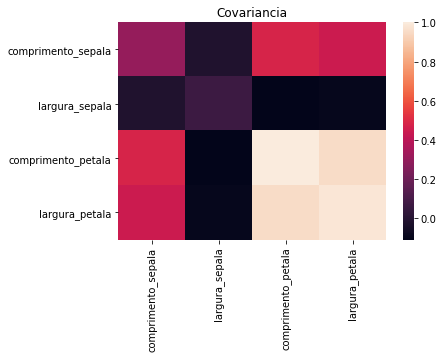

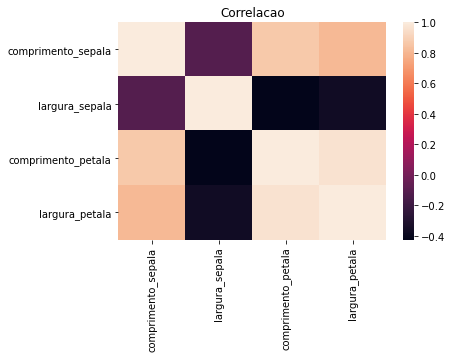

In [24]:
if __name__ == '__main__':
    # cria um mapa de cores dos valoes da covariancia
    sns.heatmap(df_covariance, 
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

    plt.title('Covariancia')
    plt.show()

    # cria um mapa de cores dos valoes da correlação
    sns.heatmap(df_correlation, 
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

    plt.title('Correlacao')
    plt.show()

É importante notar que a alta correlação entre dois atributos não significa que um deles influencia no valor do outro. Veja alguns exemplos que mostram isso em http://www.tylervigen.com/spurious-correlations

<img src="http://tylervigen.com/correlation_project/correlation_images/number-of-people-who-tripped-over-their-own-two-feet-and-died_number-of-lawyers-in-nevada.png" width="800" align="center"/>

<img src="http://tylervigen.com/correlation_project/correlation_images/works-of-visual-art-copyrighted-us_females-in-new-york-who-slipped-or-tripped-to-their-death.png" width="800" align="center"/>




## EXERCÍCIOS 

Os exercícios deverão ser feitos com relação à base de dados importada abaixo.

In [25]:
if __name__ == '__main__':
    # importa a base de dados data2.csv e guarda em um dataframe do Pandas
    df_dataset2 = pd.read_csv(os.path.join(FILES_DIRECTORY, 'data2.csv'), sep=',', index_col=None) 

**Ex. 1.** Imprima as 7 primeiras amostras da nova base de dados (*df_dataset2*).

In [26]:
if __name__ == '__main__':
    ################# ESCREVA SEU CÓDIGO AQUI  ###############################

    # vamos usar a função display para imprimir o dataframe, pois deixa mais bonito. 
    # Mas, também poderíamos ter usado a função print: print(df_dataset.head(n=7))
    
    # imprime as 7 primeiras amostras
    display(df_dataset2.head(n=7))
    
    ##########################################################################

,atributo_a,atributo_b,atributo_c,atributo_d,classe
0,-1.39710,3.3191,-1.3927,-1.99480,1
1,3.62160,8.6661,-2.8073,-0.44699,0
2,4.54590,8.1674,-2.4586,-1.46210,0
3,3.86600,-2.6383,1.9242,0.10645,0
4,3.45660,9.5228,-4.0112,-3.59440,0
5,0.32924,-4.4552,4.5718,-0.98880,0
6,4.36840,9.6718,-3.9606,-3.16250,0


**Ex. 2.** Use a função `describe()` da biblioteca `Pandas` para visualizar a média, desvio padrão, valor máximo, valor mínimo e os percentis de cada atributo da base de dados.

In [27]:
if __name__ == '__main__':
    ################# ESCREVA SEU CÓDIGO AQUI  ###############################

    # apresenta as principais estatísticas sobre a base de dados
    
    df_describe = df_dataset2.describe()
    print(df_describe)

    ##########################################################################

        atributo_a   atributo_b   atributo_c   atributo_d       classe
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


**Ex. 3**. Crie um histograma a partir dos valores do atributo `atributo_d`.

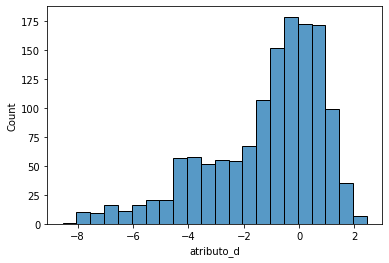

In [28]:
if __name__ == '__main__':
    ################# ESCREVA SEU CÓDIGO AQUI  ###############################

    # cria o histograma usando a função do matplotlib. Se você quiser,
    # pode usar a função da biblioteca Seaborn ou do Pandas
    
    sns.histplot(data=df_dataset2, x="atributo_d")
    
    ##########################################################################

**Ex. 4**. Crie um gráfico de dispersão que plote o atributo `atributo_a` no eixo x e o atributo `atributo_d` no eixo y. Use a biblioteca `Seaborn` para colorir os dados de acordo com a classe a que eles pertencem.

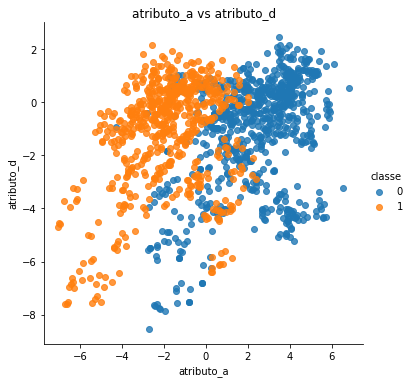

In [29]:
if __name__ == '__main__':
    ################# ESCREVA SEU CÓDIGO AQUI  ###############################
    
    sns.lmplot(x='atributo_a', y='atributo_d', data=df_dataset2, 
               fit_reg=False,  # No regression line
               hue='classe')   # Color by evolution stage
    
    # cria um título para o gráfico
    plt.title('atributo_a vs atributo_d')
    
    # mostra o gráfico
    plt.show()
    
    ##########################################################################

**Ex. 5**. Apresente um gráfico de barras com o número de exemplos de cada classe da base de dados.

0    762
1    610
Name: classe, dtype: int64

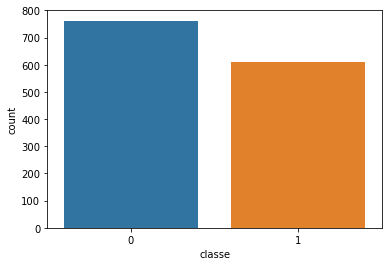

In [30]:
if __name__ == '__main__':
    ################# ESCREVA SEU CÓDIGO AQUI  ###############################
    
    display( df_dataset2['classe'].value_counts().sort_index() )

    # cria um gráfico de barras com a frequência de cada classe
    sns.countplot(x="classe", data=df_dataset2)

    #mostra o gráfico
    plt.show()
    
    ##########################################################################

**Ex. 6**. Crie dois box plots para o `atributo_c`, sendo um para cada classe.

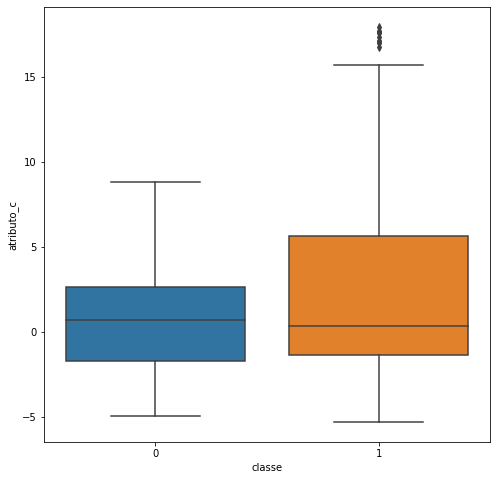

In [31]:
if __name__ == '__main__':
    ################# ESCREVA SEU CÓDIGO AQUI  ###############################
    
    # define a dimensão do gráfico
    plt.figure(figsize=(8,8))
    
    # cria o boxplot
    sns.boxplot(x="classe", y='atributo_c', data=df_dataset2, whis=1.5)
    
    #mostra o gráfico
    plt.show()
    
    ##########################################################################

**Ex. 7.** Calcule e imprima a matriz de correlação entre os atributos da base de dados. 

Obs: você pode usar a função da biblioteca `Pandas` ou a função da biblioteca `Numpy` para fazer isso.

In [32]:
if __name__ == '__main__':
    ################# ESCREVA SEU CÓDIGO AQUI  ###############################

    # matriz de covariancia
    df_covariance = df_dataset2.cov()

    # matriz de correlação
    df_correlation = df_dataset2.corr()

    print('Matriz de covariância: ')
    display(df_covariance)

    print('\n\nMatriz de correlação: ')
    display(df_correlation)

    ##########################################################################

Matriz de covariância: 


,atributo_a,atributo_b,atributo_c,atributo_d,classe
atributo_a,8.081299,4.405083,-4.666323,1.653338,-1.024310
atributo_b,4.405083,34.445710,-19.905119,-6.490033,-1.297386
atributo_c,-4.666323,-19.905119,18.576359,2.887241,0.333985
atributo_d,1.653338,-6.490033,2.887241,4.414256,-0.024464
classe,-1.024310,-1.297386,0.333985,-0.024464,0.247112




Matriz de correlação: 


,atributo_a,atributo_b,atributo_c,atributo_d,classe
atributo_a,1.000000,0.264026,-0.380850,0.276817,-0.724843
atributo_b,0.264026,1.000000,-0.786895,-0.526321,-0.444688
atributo_c,-0.380850,-0.786895,1.000000,0.318841,0.155883
atributo_d,0.276817,-0.526321,0.318841,1.000000,-0.023424
classe,-0.724843,-0.444688,0.155883,-0.023424,1.000000


**Ex. 8**. A covariância entre dois atributos pode ser calculada pela seguinte equação: 

$$\text{covariância}(x^i, x^j) = \frac{1}{n-1}  \sum_{k=1}^n (x_{k}^{i} - \bar{x}^i)(x_{k}^{j} - \bar{x}^j).$$

Crie uma função que calcule a covariância entre dois atributos quaisquer, baseado na equação acima. 

**Obs.**: não é permitido usar a função de covariância da biblioteca `NumPy` ou da `Pandas`.

In [33]:
def covariancia(atributo1, atributo2):
    """
    Função usada para calcular a covariância entre dois vetores de atributos
    """    
    
    #inicializando a covariancia. Essa é a variável que deverá ser retornada pela função
    cov = 0 
    
    # número de objetos
    n = len(atributo1)
    
    ################# COMPLETE O CÓDIGO AQUI  #################
    
    cov = 1/(n-1) * sum( (atributo1 - np.mean(atributo1)) * (atributo2 - np.mean(atributo2)) )
    
    ##########################################################
    
    return cov

if __name__ == '__main__':
    atributo1 = df_dataset2['atributo_a'].values
    atributo2 = df_dataset2['atributo_b'].values

    print('Valor esperado: 4.405083')

    cov = covariancia(atributo1, atributo2)
    print('Valor retornado pela função: %1.6f' %cov)



Valor esperado: 4.405083
Valor retornado pela função: 4.405083


**Ex. 9**. A correlação entre dois atributos pode ser calculada pela seguinte equação: 

$$\text{correlação}(x^i, x^j) = \frac{\text{covariância}(x^i, x^j)}{\text{desvio_padrão}(x^i) * \text{desvio_padrão}(x^j)}$$

Crie uma função que calcule a correlação entre dois atributos, baseado na equação acima. 

**Obs.**: não é permitido usar a função de covariância da biblioteca `NumPy` ou da `Pandas`.

In [34]:
def correlacao(atributo1, atributo2):
    """
    Função usada para calcular a correção entre dois vetores de atributos
    """
    
    #inicializando a covariancia. Essa é a variável que deverá ser retornada pela função
    corr = 0 
    
    # número de objetos
    n = len(atributo1)
    
    ################# COMPLETE O CÓDIGO AQUI  #################
    # Se você for usar a função do Numpy para calcular o desvio padrão,
    # não se esqueça de usar o parâmetro ddof=1 para fazer a correção de Bessel
    #
    # Use a função que você criou no exercício anterior para calcular 
    # o valor da covariância que será usado para calcular a correlação
    
    corr = covariancia(atributo1, atributo2) / (np.std(atributo1, ddof=1) * np.std(atributo2, ddof=1))
        
    ##########################################################
    
    return corr

if __name__ == '__main__':
    atributo1 = df_dataset2['atributo_a'].values
    atributo2 = df_dataset2['atributo_b'].values

    print('Valor esperado: 0.264026')

    corr = correlacao(atributo1, atributo2)
    print('Valor retornado pela função: %1.6f' %corr)


Valor esperado: 0.264026
Valor retornado pela função: 0.264026
